In [30]:
import pandas as pd
import xgboost as xgb
from config import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation

train=pd.read_csv('data/all_train.csv')
train_x = train.drop(['label'],axis=1)
train_y = train.label

# X_train,X_val,y_train,y_val=train_test_split(train_x,train_y,random_state=0,test_size=0.25)

In [14]:
test=pd.read_csv('data/all_test.csv')
test_x = test.drop(['User_id','Coupon_id','Merchant_id','Date_received'],axis=1)
test_preds = test[['User_id','Coupon_id','Date_received']]

print train_x.shape,test_x.shape


(454039, 41) (128993, 41)


In [21]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['label'])
        
    #Predict training set:
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['label'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print "\nModel Report"
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['label'], dtrain_predprob)
    
    if performCV:
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [24]:
train.shape

(454039, 27)

In [23]:
train=train.dropna(axis=1,how='any')

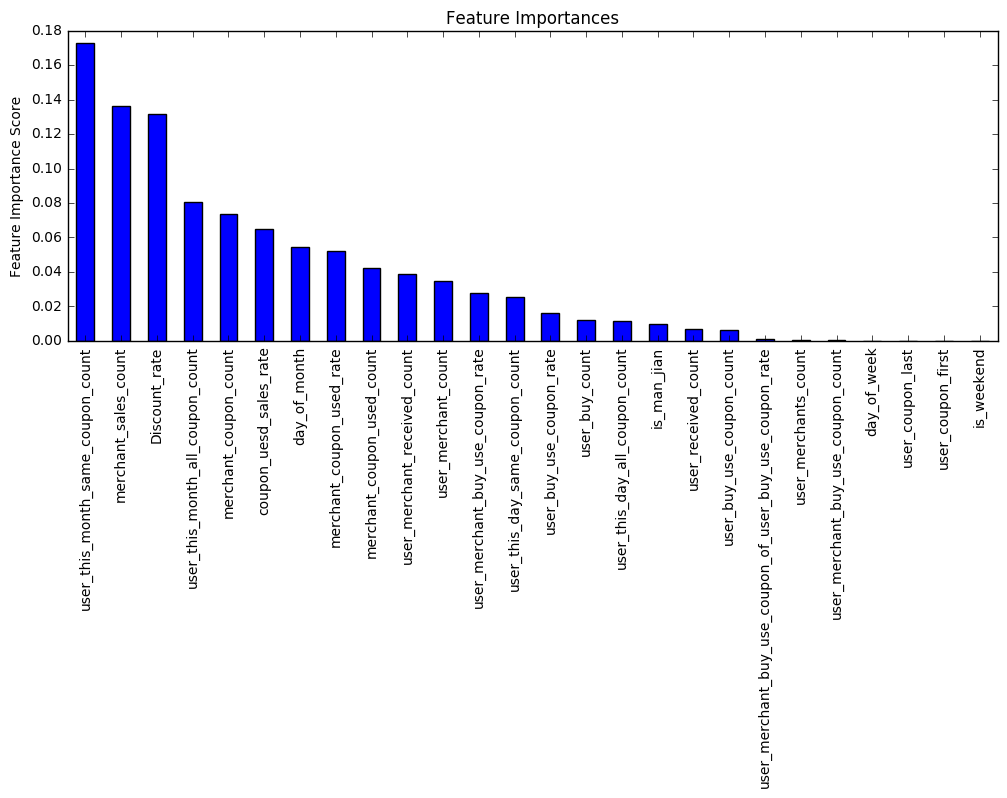

In [29]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

feat_imp = pd.Series(gbm0.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
predictors = [x for x in train.columns if x not in ['label']]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, train, predictors)


Model Report


NameError: global name 'metrics' is not defined

In [ ]:
estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=8, max_features='sqrt', max_leaf_nodes=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False)

In [4]:
params={'booster':'gbtree',
	    'objective': 'rank:pairwise',
	    'eval_metric':'auc',
	    'gamma':0.1,
	    'min_child_weight':1,
	    'max_depth':5,
	    'lambda':10,
	    'subsample':0.7,
	    'colsample_bytree':0.7,
	    'colsample_bylevel':0.7,
	    'eta': 0.01,
	    'tree_method':'exact',
	    'seed':0,
	    'nthread':12
	    }

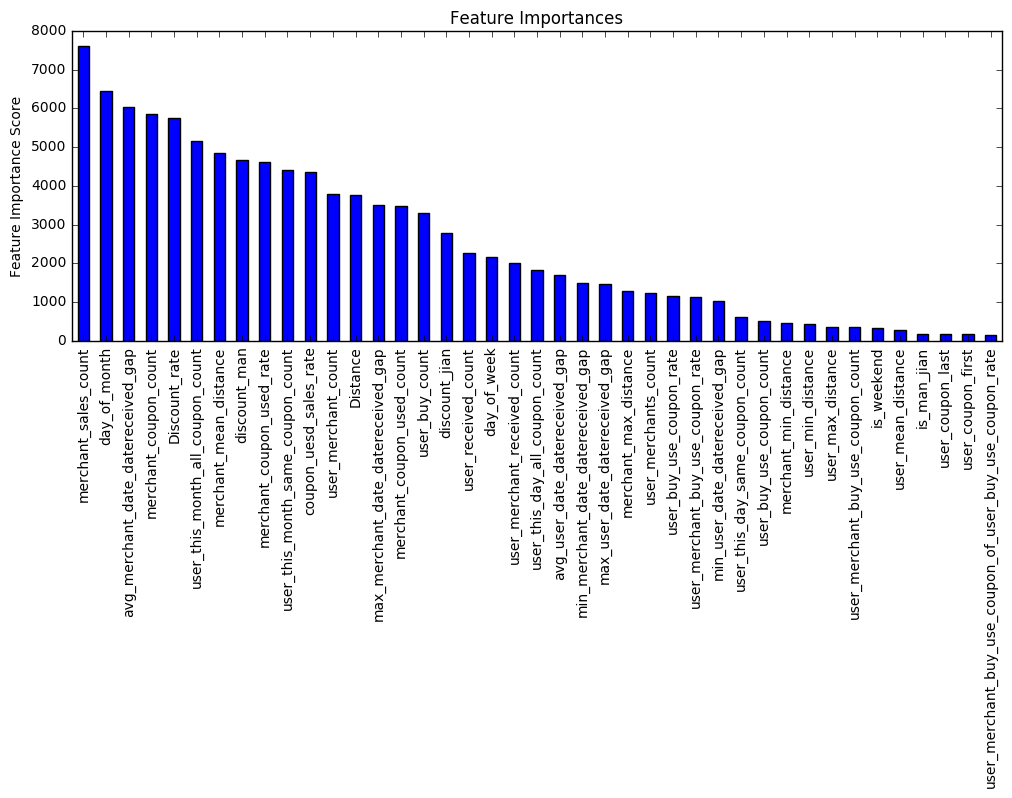

In [9]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

feat_imp = pd.Series(model0.get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')